### Задание

#### 1. Скачайте текст произведения «Война и мир».

In [2]:
files = ['tom_1.txt', 'tom_2.txt', 'tom_3.txt', 'tom_4.txt']
with open('War_and_Peace.txt', 'w') as output:
    for file in files:
        with open(file, 'rt', encoding='utf-8') as f:
            output.write(f.read())

#### 2. Очистите его, оставив только русские буквы и символы пробела.

In [1]:
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('War_and_Peace.txt', 'rt') as file:
    text = file.read().lower()
text = re.sub(r'[^\nа-яё ]', '', text)
text = re.sub(r'\s+', ' ', text)
text = re.sub(r'^\s', '', text)

In [7]:
text[:1000]

'лев толстой война и мир том том часть первая часть вторая часть третья том лев николаевич толстой война и мир том часть первая поместья мой верный раб ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я вас предупреждаю если вы мне не скажете что у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста право я верю что он антихрист я вас больше не знаю вы уж не друг мой вы уж не мой верный раб как вы говорите ну здравствуйте здравствуйте я вижу что я вас пугаю садитесь и рассказывайте так говорила в июле года известная анна павловна шерер фрейлина и приближенная императрицы марии феодоровны встречая важного и чиновного князя василия первого приехавшего на ее вечер анна павловна кашляла несколько дней у нее был грипп как она говорила грипп был тогда новое слово употреблявшееся только редкими в записочках разосланных утром с красным лакеем было написано без различия во всех или если вас граф или князь нет в виду ничего лучшего 

#### 3. Постройте матрицу переходных вероятностей.

In [3]:
rus = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
pos = {l: i for i, l in enumerate(rus)}

In [4]:
probabilities = np.zeros((len(rus), len(rus)))

In [5]:
for cp, cn in zip(text[:-1], text[1:]):
    if cp == ' ' or cn == ' ':
        continue
    else:
        probabilities[pos[cp], pos[cn]] += 1

In [6]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [7]:
df = pd.DataFrame(probabilities, index=(c for c in rus), columns=(c for c in rus))

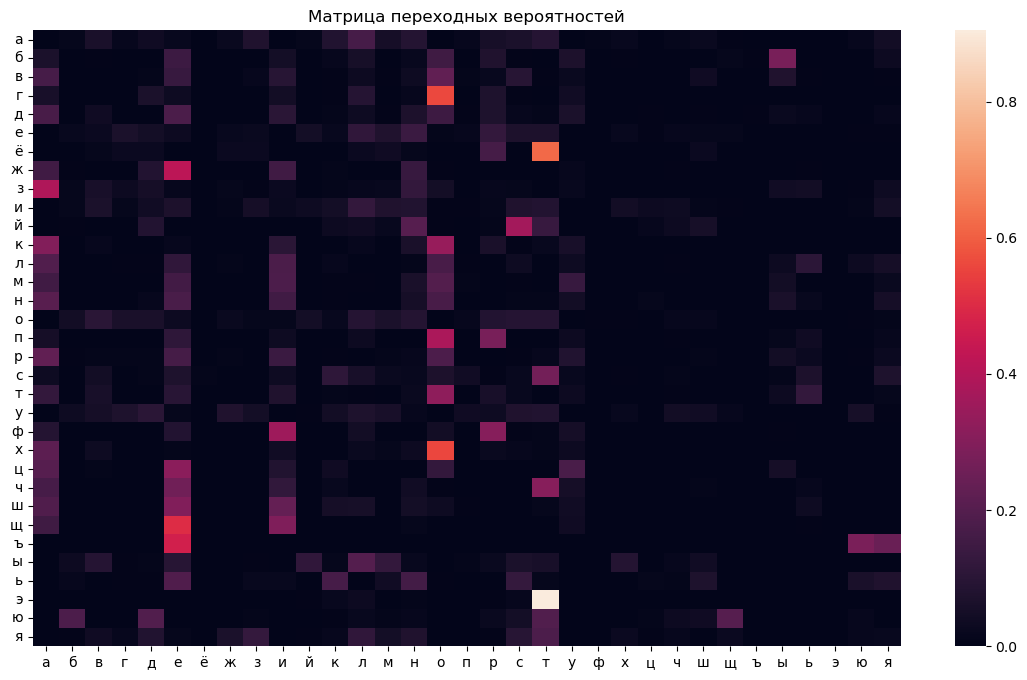

In [8]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.yticks(rotation=0)
plt.title('Матрица переходных вероятностей')
plt.show()

#### 4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

In [9]:
start = pos['п']
end = pos['р']
prior = 1. / len(rus)
results = []
for i in rus:
    for j in rus:
        proba = prior * probabilities[start, pos[i]] * probabilities[pos[i], pos[j]] * probabilities[pos[j], end]
        if proba > 0:
            results.append((''.join(['п', i, j, 'р']), proba))

In [10]:
# Отсортируем результаты по убыванию вероятности
results.sort(key=lambda x: x[1], reverse=True)
for result in results:
    print(result[0], result[1])

прер 0.00016915217346855644
прор 0.00012585168041912207
прар 0.00010454537288042011
потр 6.17061081972052e-05
попр 5.4192955705640256e-05
погр 5.359045016065688e-05
подр 5.289232324435615e-05
поер 4.521235081104024e-05
побр 3.968530950910235e-05
пьер 2.6639532272385544e-05
повр 2.266260945647831e-05
прур 2.215902748154298e-05
пепр 1.6061857787672992e-05
пегр 1.586593744232003e-05
прир 1.564086162716749e-05
покр 1.5435632415984056e-05
пофр 1.438386548032135e-05
плер 1.370686165689456e-05
плор 1.3538052599047454e-05
петр 1.3329166706590215e-05
пеер 1.2575359100002578e-05
пькр 1.2166256229715966e-05
педр 1.2035453170702621e-05
плар 1.0004208787027992e-05
пупр 9.488976936033822e-06
прыр 8.836543157602847e-06
пиер 8.77696827966676e-06
патр 8.250494004330976e-06
пакр 7.785449514252687e-06
папр 7.4593126821559065e-06
поср 7.316642839906259e-06
пртр 7.262187369332966e-06
пудр 6.63509308346828e-06
прдр 5.713905467495233e-06
пебр 5.420668041366283e-06
пргр 4.922016513477949e-06
питр 4.8980049215

#### 5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

In [13]:
start_letter = 'б'
length = 8

word = []
word.append(start_letter)
for i in range(length-1):
    index = pos[word[i]]
    next_char = np.random.choice(list(rus), p=probabilities[index])
    word.append(next_char)

print (''.join(word))

былоскву


#### 6. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

In [100]:
series = pd.read_csv('monthly-car-sales-in-quebec-1960.csv')['Count']

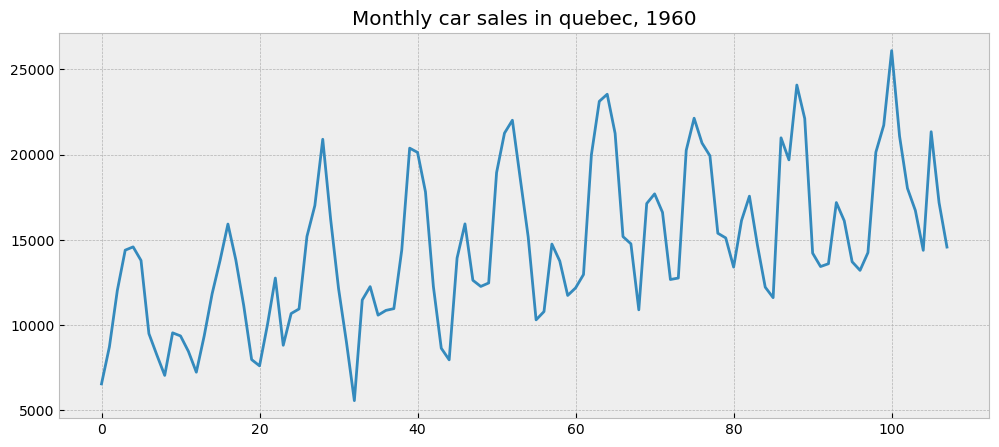

In [80]:
plt.style.use('bmh')
plt.figure(figsize=(12, 5))
plt.plot(series)
plt.title('Monthly car sales in quebec, 1960')
plt.show()

In [101]:
values = series.values.reshape(-1,1)

In [191]:
from hmmlearn.hmm import GaussianHMM

scores = []
for n in range(1, 10):
    model = GaussianHMM(n_components=n, covariance_type='diag', n_iter=1000)
    model.fit(values)
    scores.append(model.score(values))
    print(n, model.score(values))

1 -1061.8244062748665
2 -1039.7411670057313
3 -1039.6846819650427
4 -1012.64716733888
5 -1008.5883618340476
6 -1012.1654494040044
7 -990.2967438548649
8 -993.2487794542933
9 -981.296185539708


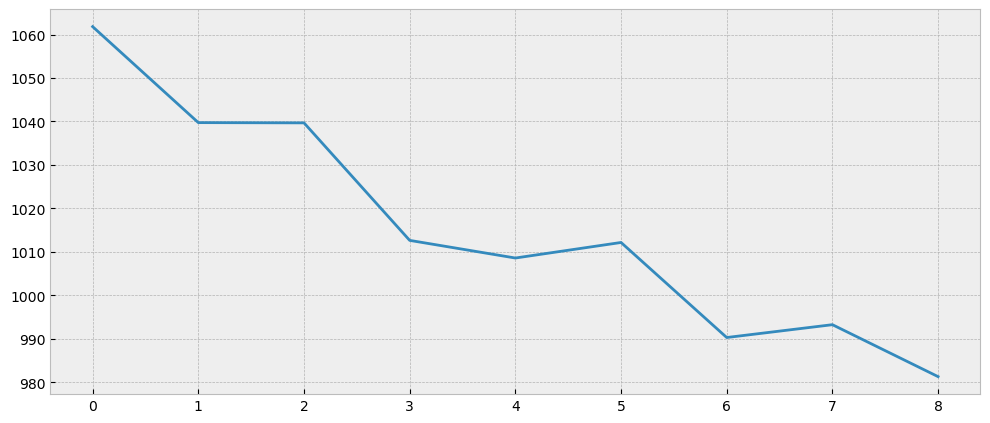

In [194]:
plt.figure(figsize=(12, 5))
plt.plot(scores*np.array([-1]))